# Q2. Sampling and Stochastic Gradient Descent

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(a) Sampling data points

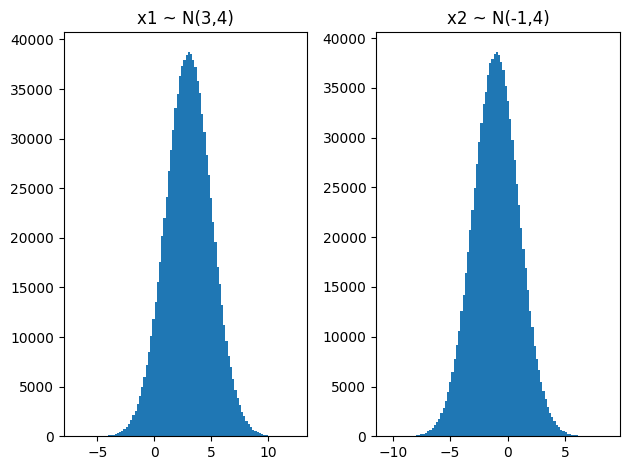

In [16]:
n = 1000000
theta=np.array([[3],[1],[2]])

x1 = np.random.normal(3,2,n)
x2 = np.random.normal(-1,2,n)

fig, ax = plt.subplots(1,2)
ax[0].hist(x1, bins=100)
ax[0].set_title("x1 ~ N(3,4)")
ax[1].hist(x2, bins=100)
ax[1].set_title("x2 ~ N(-1,4)")
fig.tight_layout()

In [17]:
X = np.column_stack([np.ones(n),x1,x2])

eps = np.random.normal(0,np.sqrt(2),n)
eps = eps.reshape(-1,1)

Y = X@theta + eps

(b) SGD

In [18]:
def J(X: np.ndarray, Y: np.ndarray, theta: np.ndarray):
    sq_diff = (X@theta - Y)**2
    return sq_diff.mean()/2

def grad_J(X: np.ndarray, Y: np.ndarray, theta: np.ndarray):
    diff = (X@theta-Y)
    return X.T@diff/len(Y)

def std_normalize(X: np.ndarray):
    X_mu = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X-X_mu)/X_std

In [19]:
base_error = J(X,Y,np.array([[3],[1],[2]]))
print(base_error)

1.0010397759208114


In [23]:
def SGD(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, batch_size=100, eta=0.01, stop_loss=0.001, epoch_lim=1000):
    theta_history = [theta]
    cost_history = [J(X,Y,theta)]

    epoch = 0
    while epoch < epoch_lim:
        avg_cost = 0
        avg_cost_old = 'w'

        # define checks for sample_size>=1000, else convergence issues
        sample_size = 0

        batch_len = len(Y)//batch_size
        for i in range(batch_len):
            X_batch = X[i*batch_size: (i+1)*batch_size]
            Y_batch = Y[i*batch_size: (i+1)*batch_size]

            theta_new = theta - eta*grad_J(X_batch,Y_batch,theta)
            avg_cost += J(X_batch,Y_batch,theta_new)
            sample_size += batch_size

            theta = theta_new
            theta_history.append(theta)

        avg_cost /= batch_len
        if avg_cost_old != 'w':
            if abs(theta_new-theta) < stop_loss:
                return theta_history, cost_history, epoch

        cost_history.append(avg_cost)
        avg_cost_old = avg_cost
        avg_cost = 0

        # avg_cost /= batch_len
        # if avg_cost_old != 'w':
        #     # convergence criteria for change in avg_cost of samples
        #     if abs(avg_cost-avg_cost_old) < stop_loss:
        #         # sometimes converges at some local minima instead, to avoid this we can set a parameter for avg_cost to converge
        #         # since, J for theta = [3 1 2].T is base_error ~ 1, we set it as say < 1
                
        #         # if avg_cost < 0.6: - too low, essentially goes full 100 epoch
        #         # if avg_cost < 1.4: - too high, random converge 
        #         # if avg_cost < 1: 
        #         theta = theta_new
        #         theta_history.append(theta)
        #         cost_history.append(avg_cost)
        #         return theta_history, cost_history, epoch
                
        # cost_history.append(avg_cost)
        # avg_cost_old = avg_cost
        # avg_cost = 0
        sample_size = 0

        # need same shuffling
        # np.random.shuffle(X)
        # np.random.shuffle(Y)
        permute_idx = np.random.permutation(len(Y))
        X = X[permute_idx]
        Y = Y[permute_idx]

        epoch += 1

    if epoch == epoch_lim:
        print("Max epoch exceeded")

    return theta_history, cost_history, epoch

In [20]:
theta_0 = np.zeros(3).reshape(-1,1)

In [21]:
def sgd_test_print_info(X,Y,theta_0,batch_size):
    theta_h, cost_h, epoch = SGD(X,Y,theta_0, batch_size=batch_size)

    print("Final theta = ",theta_h[-1])
    print("Avg cost at convergence= ",cost_h[-1])

    print("No. of iterations = ",len(theta_h))
    print("No. of samples = ",len(cost_h))
    print("No. of epoch = ",epoch)

    return theta_h, cost_h

In [24]:
# batch_size = 100
t100, c100 = sgd_test_print_info(X,Y,theta_0,100)

print("Final cost = ", J(X,Y,t100[-1]))

Max epoch exceeded
Final theta =  [[2.98968928]
 [1.01010554]
 [2.00664361]]
Avg cost at convergence=  0.9982504134339543
No. of iterations =  10000001
No. of samples =  1001
No. of epoch =  1000
Final cost =  1.0013966239132304


In [10]:
# batch_size = 1 (stochastic)
t1, c1 = sgd_test_print_info(X,Y,theta_0,1)

print("Final cost = ", J(X,Y,t1[-1]))

KeyboardInterrupt: 

In [11]:
# batch_size = 10000
t10000, c10000 = sgd_test_print_info(X,Y,theta_0,10000)

print("Final cost = ", J(X,Y,t10000[-1]))

Max epoch exceeded
Final theta =  [[2.99988413]
 [0.99807648]
 [1.99879918]]
Avg cost at convergence=  1.0011541257065517
No. of iterations =  10001
No. of samples =  101
No. of epoch =  100
Final cost =  1.001203538845576


In [13]:
# batch_size = 1000000 (Batch GD)
t1000000, c1000000 = sgd_test_print_info(X,Y,theta_0,1000000)

print("Final cost = ", J(X,Y,t1000000[-1]))

Max epoch exceeded
Final theta =  [[2.81599479]
 [1.04015098]
 [1.98562072]]
Avg cost at convergence=  1.0060211288326413
No. of iterations =  1001
No. of samples =  1001
No. of epoch =  1000
Final cost =  1.0060211288326415


(c) Convergence with varying 'r'

No, different batch sizes converge at different rates, as we can see from the number of samples(of size 1000) being tested. While they try to converge to the same value i.e. theta = [[3], [1], [2]], there is randomness in smaller batches, and convergence sometimes deviates from minima.

We can also observe that for smaller batch sizes, the average costs are suspiciously low. This may be because the smaller the 'r', the higher is the local bias. Thus, the average cost is quite low even when the actual cost is oscillating around the minima. As can be seen for r = 1.

For r = 1000000, we are essentially performing Batch Gradient Descent. Due to the large size, the algorithm is unable to converge in time. Thus, the cost(which is equivalent to actual cost, unlike r = 1) is very high.

We obtain best results for r = 100, 10000, 1, 1000000 in that order.
Convergence is fastest in order of smaller batch sizes.

Text(0.5, 1.0, 'Comparison of cost convergence for different batch sizes')

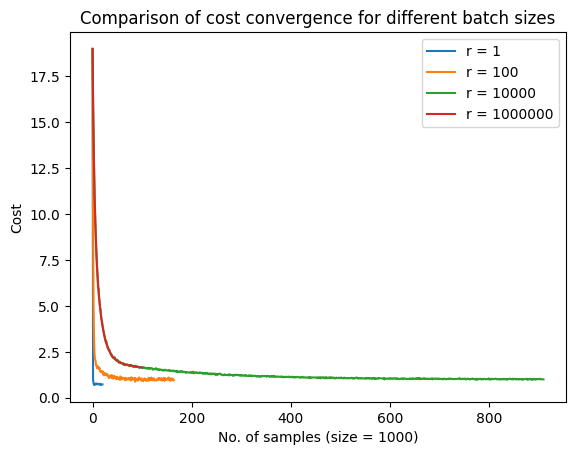

In [23]:
fig, ax = plt.subplots()

ax.plot(c1, label="r = 1")
ax.plot(c100, label="r = 100")
ax.plot(c10000, label="r = 10000")
ax.plot(c1000000, label="r = 1000000")
    
plt.legend()
plt.xlabel('No. of samples (size = 1000)')
plt.ylabel('Cost')
plt.title('Comparison of cost convergence for different batch sizes')

(c) Testing on sample data

In [14]:
import pandas as pd

data = pd.read_csv("../data/q2/q2test.csv")

In [15]:
x1_test = data['X_1'].to_numpy()
x2_test = data['X_2'].to_numpy()

X_test = np.column_stack([np.ones(10000).reshape(-1,1), x1_test, x2_test])

Y_test = data['Y'].to_numpy().reshape(-1,1)

In [16]:
err1 = J(X_test,Y_test,t1[-1])
err100 = J(X_test,Y_test,t100[-1])
err10000 = J(X_test,Y_test,t10000[-1])
err1000000 = J(X_test,Y_test,t1000000[-1])

print("Learned hypothesis error : ", base_error)
print("For r=1 : ", err1)
print("For r=100 : ", err100)
print("For r=10000 : ", err10000)
print("For r=1000000 : ", err1000000)

Learned hypothesis error :  1.0025313259759328
For r=1 :  1.2677244428781405
For r=100 :  0.9843844910951822
For r=10000 :  1.1568292448976194
For r=1000000 :  13.991906854469248


(d) Plot of convergence paths

In [17]:
import matplotlib.animation as anime

def animator(fig, ax, arr1, arr2, arr3=[], gif_add="fig.gif"):
    # delay of 0.2s => 5 fps
    writer = anime.PillowWriter(fps=20)

    x1_prog = []
    x2_prog = []
    x3_prog = []
    n_frames = len(arr1)

    with writer.saving(fig, gif_add, dpi=150):
        for i in range(n_frames):
            x1_prog.append(arr1[i])
            x2_prog.append(arr2[i])
            
            if len(arr3):
                x3_prog.append(arr3[i])
                ax.plot(x1_prog, x2_prog, x3_prog, marker='.',color='b',alpha=0.6)
            else:
                ax.plot(x1_prog, x2_prog, marker='.')
            writer.grab_frame()

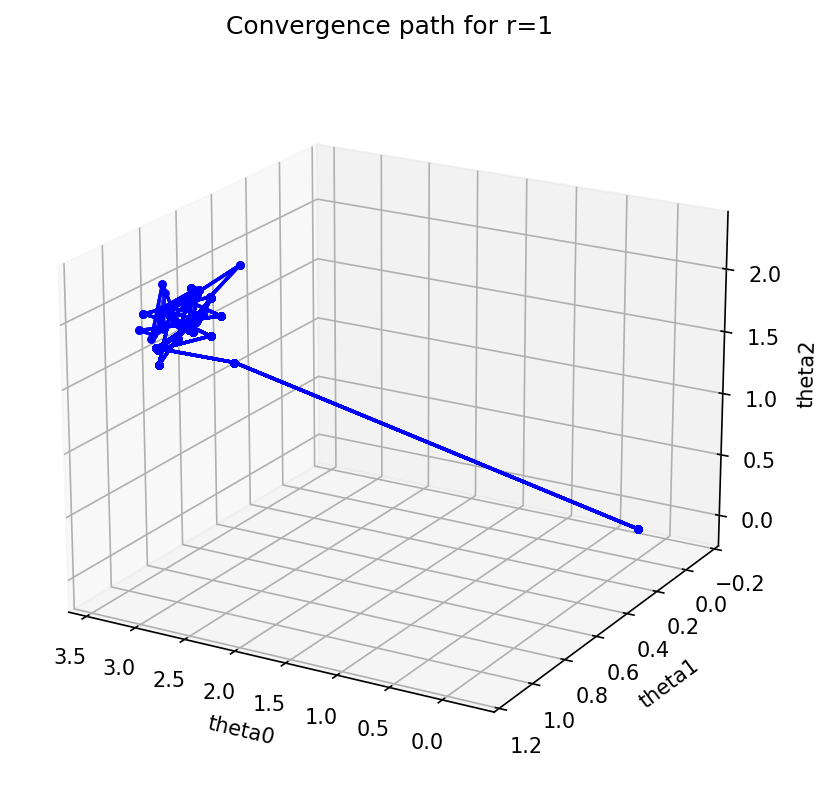

In [18]:
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.view_init(elev=20, azim=120)
#surf = ax.plot_surface(t0_space, t1_space, cost_mesh, cmap='viridis', edgecolor=None, alpha=0.4)

ax.set_title("Convergence path for r=1")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('theta2')

ax.set_xlim(-0.4,3.6)
ax.set_ylim(-0.2,1.2)
ax.set_zlim(-0.2,2.4)

# len(t1) ~= 25000, so we only add a few frames
path = t1[::500]
conv_x, conv_y, conv_z = np.stack(path,axis=0).reshape((len(path),3)).T

#ax.plot(conv_x, conv_y, conv_z, marker='.',alpha=0.6)

animator(fig, ax, conv_x, conv_y, conv_z, gif_add="./plots/q2d_r1path.gif")

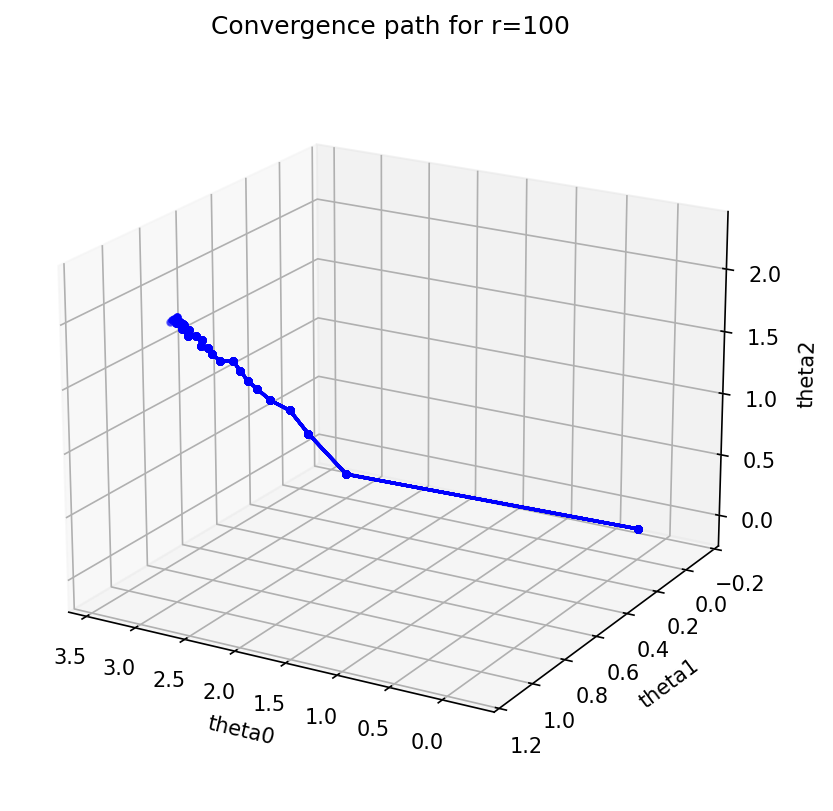

In [19]:
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.view_init(elev=20, azim=120)
#surf = ax.plot_surface(t0_space, t1_space, cost_mesh, cmap='viridis', edgecolor=None, alpha=0.4)

ax.set_title("Convergence path for r=100")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('theta2')

ax.set_xlim(-0.4,3.6)
ax.set_ylim(-0.2,1.2)
ax.set_zlim(-0.2,2.4)

# len(t100) ~= 3000, so we only add a few frames
path = t100[::50]
conv_x, conv_y, conv_z = np.stack(path,axis=0).reshape((len(path),3)).T

# ax.plot(conv_x, conv_y, conv_z, marker='.',alpha=0.6)

animator(fig, ax, conv_x, conv_y, conv_z, gif_add="./plots/q2d_r100path.gif")

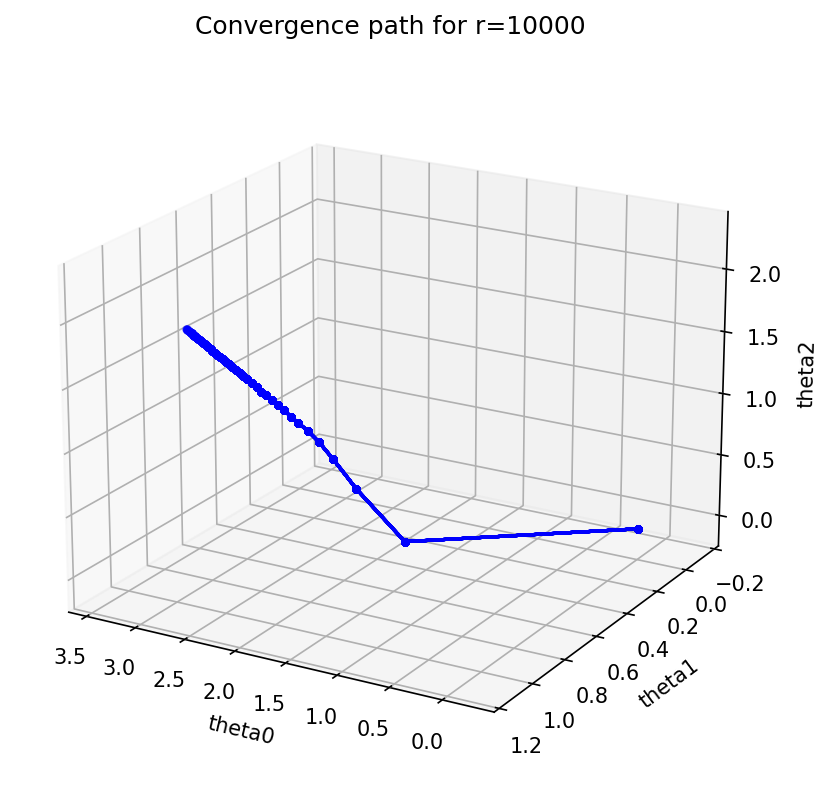

In [20]:
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.view_init(elev=20, azim=120)
#surf = ax.plot_surface(t0_space, t1_space, cost_mesh, cmap='viridis', edgecolor=None, alpha=0.4)

ax.set_title("Convergence path for r=10000")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('theta2')

ax.set_xlim(-0.4,3.6)
ax.set_ylim(-0.2,1.2)
ax.set_zlim(-0.2,2.4)

# len(t10000) ~= 1000, so we only add a few frames
path = t10000[::20]
conv_x, conv_y, conv_z = np.stack(path,axis=0).reshape((len(path),3)).T

# ax.plot(conv_x, conv_y, conv_z, marker='.',alpha=0.6)

animator(fig, ax, conv_x, conv_y, conv_z, gif_add="./plots/q2d_r10000path.gif")

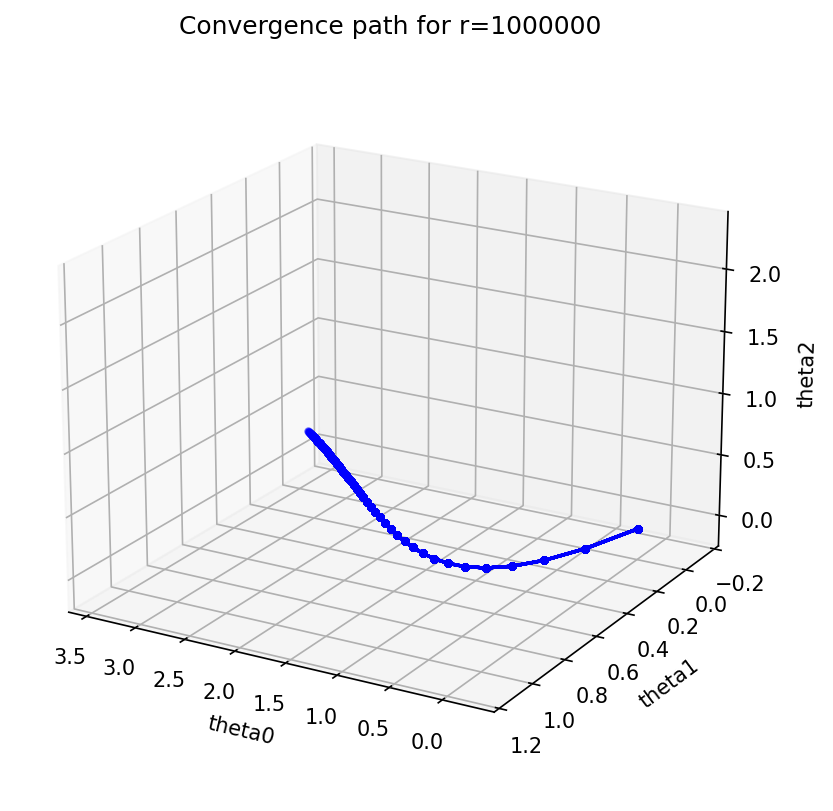

In [21]:
fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_axes([0,0,1,1],projection='3d')

ax.view_init(elev=20, azim=120)
#surf = ax.plot_surface(t0_space, t1_space, cost_mesh, cmap='viridis', edgecolor=None, alpha=0.4)

ax.set_title("Convergence path for r=1000000")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('theta2')

ax.set_xlim(-0.4,3.6)
ax.set_ylim(-0.2,1.2)
ax.set_zlim(-0.2,2.4)

# len(t1000000) == 101, so we only add a few frames
path = t1000000[::2]
conv_x, conv_y, conv_z = np.stack(path,axis=0).reshape((len(path),3)).T

# ax.plot(conv_x, conv_y, conv_z, marker='.',alpha=0.6)

animator(fig, ax, conv_x, conv_y, conv_z, gif_add="./plots/q2d_r1000000path.gif")

Note: Speed of gif is not indicative of speed of algorithm.